In [1]:
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
from wordcloud import WordCloud
from textblob import TextBlob

c:\Users\Saad-Asif\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Dataset loading

In [1]:
dataset = load_dataset("ealvaradob/phishing-dataset", "texts", trust_remote_code=True)
df = pd.DataFrame(dataset['train'])

NameError: name 'load_dataset' is not defined

In [3]:
print("Dataset Columns:", df.columns)
print("First 5 Rows:\n", df.head())

Dataset Columns: Index(['text', 'label'], dtype='object')
First 5 Rows:
                                                 text  label
0  re : 6 . 1100 , disc : uniformitarianism , re ...      0
1  the other side of * galicismos * * galicismo *...      0
2  re : equistar deal tickets are you still avail...      0
3  \nHello I am your hot lil horny toy.\n    I am...      1
4  software at incredibly low prices ( 86 % lower...      1


# Data Analysis

In [4]:
# check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
text     0
label    0
dtype: int64


In [5]:
# Label Distribution
label_distribution = df['label'].value_counts()
print("\nLabel Distribution:")
print(label_distribution)


Label Distribution:
label
0    12465
1     7672
Name: count, dtype: int64


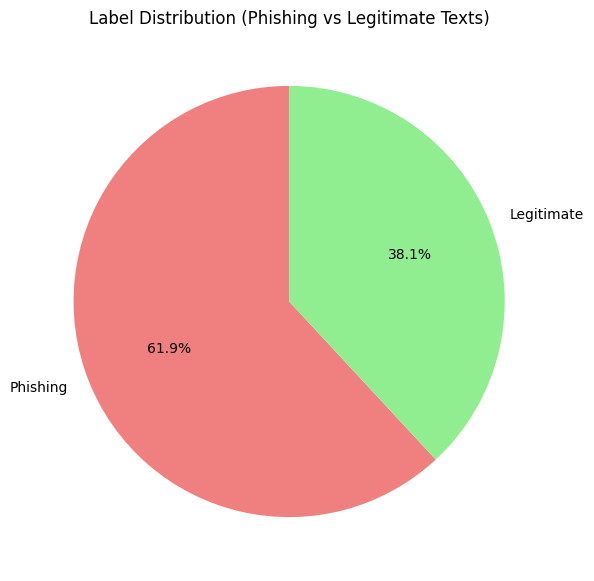

In [6]:
# Distribution of labels
plt.figure(figsize=(7, 7))
label_distribution.plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'], labels=['Phishing', 'Legitimate'])
plt.title("Label Distribution (Phishing vs Legitimate Texts)")
plt.ylabel('')
plt.show()

# Model Training

In [7]:
X = df['text']  
y = df['label'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training Features Shape: {X_train.shape}")
print(f"Training Labels Shape: {y_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Testing Labels Shape: {y_test.shape}")

Training Features Shape: (16109,)
Training Labels Shape: (16109,)
Testing Features Shape: (4028,)
Testing Labels Shape: (4028,)


In [8]:
vectorizer = CountVectorizer(max_features=10000)  
classifier = MultinomialNB()

X_train_vec = vectorizer.fit_transform(X_train)

classifier.fit(X_train_vec, y_train)

MultinomialNB()

## Save the model

In [9]:
from sklearn.pipeline import Pipeline
model_pipeline = Pipeline([('vectorizer', vectorizer), ('nb', classifier)])

with open("EMail_Detection_98.pkl", "wb") as file:
    pickle.dump(model_pipeline, file)

## Testing the model

In [10]:
X_test_vec = vectorizer.transform(X_test)
y_pred = classifier.predict(X_test_vec)

train_accuracy = accuracy_score(y_train, classifier.predict(X_train_vec))
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9166
Testing Accuracy: 0.9106


In [11]:
X_test_vec = vectorizer.transform(X_test)

texts = X_test[:100].values  
predictions = classifier.predict(X_test_vec[:100])  
true_labels = y_test[:100].values 

print(f"{'Prediction':<12} {'True Label':<12} {'Status':<12} {'Text (Truncated)'}")
print("=" * 120)

def truncate_text(text, word_limit=10):
    words = text.split()
    return " ".join(words[:word_limit]) + "..." if len(words) > word_limit else text

for pred, true, text in zip(predictions, true_labels, texts):
    truncated_text = truncate_text(text)
    status = "CORRECT" if pred == true else "INCORRECT"
    color = 'green' if status == "CORRECT" else 'red'
    print(f"{pred:<12} {true:<12} {colored(status, color):<12} {truncated_text}")

accuracy = accuracy_score(true_labels, predictions)
print(f"\nAccuracy on first 100 samples: {accuracy:.4f}")

Prediction   True Label   Status       Text (Truncated)
0            0            CORRECT      fw : csfb independent power weekly - issue # 32...
0            0            CORRECT      Some local Irish wildlifehttp://www.iol.ie/~padraiga/pics/wild1.jpg http://www.iol.ie/~padraiga/pics/wild2.jpgwas I bored or what?PÃ¡draig. --...
0            0            CORRECT      Who u talking about?
0            0            CORRECT      did the trick. Thanks to those who answered. For the...
0            0            CORRECT      limit order usage today external orders submitted : 812 external...
0            0            CORRECT      On Fri, 13 Sep 2002 the voices made carlo@alinoe.com write:>...
0            0            CORRECT      prototypical vso lg ? i need good examples of "...
0            0            CORRECT      from the enron india newsdesk - april 27 th newsclips...
1            1            CORRECT      Dear Friend,A recent survey by Nielsen/Netratings says that "The Internet...
1 